<a href="https://colab.research.google.com/github/Riaj509/Thesis-Fake-News-detection-using-transform-model/blob/main/multilingual-bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install bnlp_toolkit
! pip install banglanltk
! pip install bnltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 55.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=0056e51dbe21facc8afa64472cf1ca8f74458249ae24428bd1050f3d411ad614
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 25.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-w

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 124.5 MB/s eta 0:00:00


In [ ]:
! pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.2 MB/s eta 0:00:00


In [ ]:
import io
import re
from bnlp.corpus.util import remove_stopwords
from bnltk.stemmer import BanglaStemmer
import banglanltk as bn
from matplotlib import font_manager

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
import string
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/dataset/Copy of final_20k.csv')

In [ ]:
df.head()

,text,label
0,শঙ্কামুক্ত পান্ডিয়া | এশিয়া কাপের ভারত-পাকিস্ত...,1.0
1,কাল বিশ্ব পর্যটন দিবস | আগামীকাল বিশ্ব পর্যটন ...,1.0
2,খালেদা জিয়ার জামিনের মেয়াদ বাড়ল | জিয়া অরফানেজ...,1.0
3,বিশ্ব মিডিয়ায় ২১ আগস্ট মামলার রায় | ২০০৪ সালে ...,1.0
4,উপ-অঞ্চল সেরা হল আজিম মেমোরিয়াল উচ্চ বিদ্যালয় ...,1.0


In [ ]:
df['label'].astype(int).value_counts()

1    10000
0    10000
Name: label, dtype: int64

In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits

In [ ]:
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

In [ ]:
def bn_lemmatization(text):
    return bn.stemmer(text)
def remove_bn_stopwords(text):
    final_text = []
    text = remove_stopwords(text, stopwords)
    for word in text:
      text = remove_stopwords(word, stopwords)
      final_text.append(word)
    return " ".join(final_text)

In [ ]:
def cleaning(text):
    text = remove_bn_stopwords(text)
    text = remove_punctuation(text)
    text = bn_lemmatization(text)
    return text
df["text"]=df['text'].apply(cleaning)

<ipython-input-13-2f03a84fd62f>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
from transformers import BertTokenizer
from transformers import TFBertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [ ]:
model_bert = TFBertModel.from_pretrained('bert-base-multilingual-cased')

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
max_len=40
sentences=df["text"]
labels=df["label"]
len(sentences),len(labels)

(20000, 20000)

In [ ]:
mbert_input=tokenizer.encode_plus(sentences[0],add_special_tokens = True,max_length =40,pad_to_max_length = True,truncation=True)
mbert_input

{'input_ids': [101, 976, 111229, 66946, 58354, 69778, 100, 100, 948, 96397, 11421, 74313, 103093, 972, 40685, 39427, 953, 29621, 79512, 939, 11737, 24383, 29261, 41602, 100, 65288, 15002, 100, 58918, 95386, 937, 83924, 21790, 968, 75468, 15010, 937, 13458, 28410, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.decode(mbert_input['input_ids'])

'[CLS] শঙ্কামুক্ত [UNK] [UNK] কাপের ভারত পাকিস্তান ম্যাচ চলাকালীন ইনজুরিতে [UNK] টিম [UNK] অন্যতম সেরা অস্ত্র পেসার অলরা [SEP]'

In [ ]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    mbert_input_shape=tokenizer.encode_plus(
        sent,add_special_tokens = True,
        max_length =max_len,
        pad_to_max_length = True,
        return_attention_mask = True,
        truncation=True)
    input_ids.append(mbert_input_shape['input_ids'])
    attention_masks.append(mbert_input_shape['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

In [ ]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
  from tensorflow.keras.layers import Dense,Dropout,Input
  def create_model():
      #two input input_shape and masks
    input_shape = Input(shape = (max_len,), dtype='int64')
    masks= Input(shape = (max_len,), dtype='int64')
    bert = model_bert(input_shape, attention_mask=masks)[1]# pooler_output->2D
    dense = Dense(512,activation='relu')(bert)
    dropout= Dropout(0.5)(dense)
    pred = Dense(2, activation='softmax')(dropout)
    model = tf.keras.Model(inputs=[input_shape,masks], outputs=pred)
    print(model.summary())
    return model

In [ ]:
model=create_model()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 input_30 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 tf_bert_model_4 (TFBertModel)  multiple             177853440   ['input_29[0][0]',               
                                                                  'input_30[0][0]']               
                                                                                                  
 dense_16 (Dense)               (None, 512)          393728      ['tf_bert_model_4[2][1]']  

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss=loss,optimizer=optimizer, metrics=[metric])

In [ ]:
history=model.fit([X_train_input,train_mask],
                  Y_train_label,batch_size=64,
                  epochs=10,
                  validation_data=([X_test_input,test_mask],Y_test_label)
                  )

Epoch 1/10
250/250 [==============================] - 176s 524ms/step - loss: 0.6669 - accuracy: 0.5714 - val_loss: 0.6037 - val_accuracy: 0.6478
Epoch 2/10
250/250 [==============================] - 129s 516ms/step - loss: 0.5658 - accuracy: 0.6963 - val_loss: 0.5094 - val_accuracy: 0.7445
Epoch 3/10
250/250 [==============================] - 129s 516ms/step - loss: 0.4210 - accuracy: 0.8113 - val_loss: 0.4326 - val_accuracy: 0.8090
Epoch 4/10
250/250 [==============================] - 139s 557ms/step - loss: 0.3015 - accuracy: 0.8778 - val_loss: 0.3765 - val_accuracy: 0.8565
Epoch 5/10
250/250 [==============================] - 139s 557ms/step - loss: 0.2232 - accuracy: 0.9152 - val_loss: 0.4264 - val_accuracy: 0.8618
Epoch 6/10
250/250 [==============================] - 130s 518ms/step - loss: 0.1654 - accuracy: 0.9405 - val_loss: 0.3886 - val_accuracy: 0.8792
Epoch 7/10
250/250 [==============================] - 139s 556ms/step - loss: 0.1448 - accuracy: 0.9476 - val_loss: 0.4597 -

In [ ]:
prediction= model.predict([X_test_input,test_mask],batch_size=64)
pred_labels = prediction.argmax(axis=1)
accuracy_score(Y_test_label,pred_labels)*100

63/63 [==============================] - 18s 168ms/step


88.425

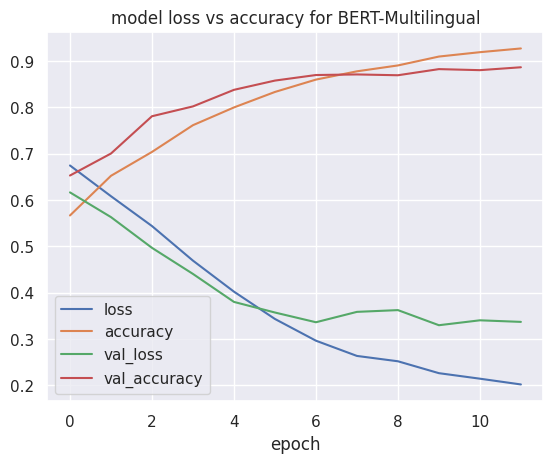

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_loss'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model loss vs accuracy for BERT-Multilingual')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy','val_loss','val_accuracy' ])
pyplot.show() 

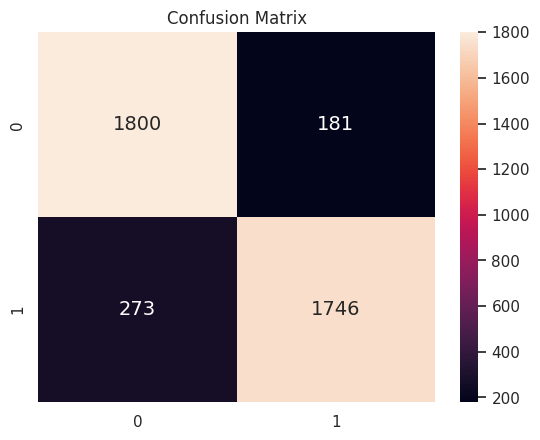

In [ ]:
cm=confusion_matrix(Y_test_label, pred_labels)
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report\n')
print(classification_report(Y_test_label,pred_labels))

Classification Report

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1981
         1.0       0.91      0.86      0.88      2019

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

